In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## 1. Generate sine wave

In [2]:
n = 1000 # number of samples
A = 1 # peak-to-peak amplitude is 2 Hz
offset = 2 # the vertical shift
fs = 100 # sampling frequency Hz
f = 2 # wave frequency
total_time = n / fs
T = np.linspace(0, total_time, n, endpoint=False)

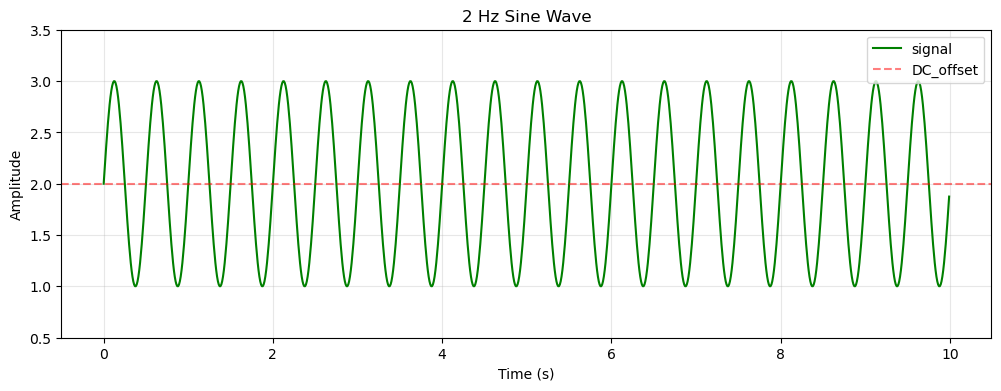

In [22]:
signal = A * np.sin(2 * np.pi * f * T ) + offset
plt.figure(figsize=(12, 4))
plt.plot(T, signal, color='green', label='signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('2 Hz Sine Wave')
plt.grid(True, alpha=0.3)
plt.ylim([0.5, 3.5])
plt.axhline(y=offset, color='r', linestyle='--', alpha=0.5, label= 'DC_offset')
plt.legend()
plt.show()


## 2. Calculate the standard deviation

In [4]:
mean1 = np.sum(signal) / n
# compare to np.mean
mean2 = np.mean(signal)
mean1 == mean2

True

In [5]:
sd1 = np.sqrt(np.sum((signal - mean1)**2 / n))
sd2 = np.std(signal)
print(sd1, sd2)

0.7071067811865476 0.7071067811865476


## 3. Generate Square wave

In [6]:
square_wave = np.sign(np.sin(2 * np.pi * f * T))
y = A * square_wave + offset

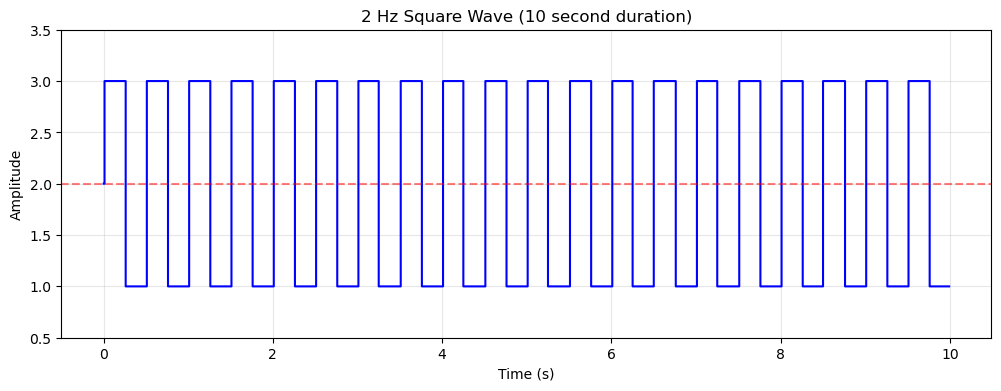

In [ ]:
# Plot
plt.figure(figsize=(12, 4))
plt.plot(T, y, 'b-', linewidth=1.5, drawstyle='steps-post')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('2 Hz Square Wave')
plt.grid(True, alpha=0.3)
plt.ylim([0.5, 3.5])
plt.axhline(y=offset, color='r', linestyle='--', alpha=0.5)
plt.show()

In [8]:
# square wave
square_mean1 = np.sum(y) / n
# compare to np.mean
square_mean2 = np.mean(y)
square_mean1 == square_mean2

True

In [ ]:
square_sd1 = np.sqrt(np.sum((y - square_mean1)**2 / n))
square_sd2 = np.std(y)
print(f'Manual SD = {square_sd1:.5f},\nNumpy SD function = {square_sd2:.5f}')

Manual SD = 0.99949,
numpy SD function = 0.99949


## 4. Random uniform noise

In [10]:
random_noise = np.random.uniform(low=1,high=3,size=n)

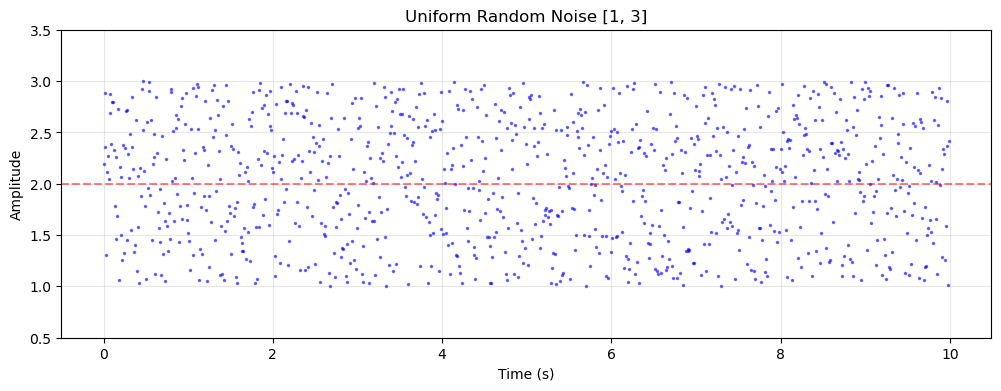

In [24]:
# Plot
plt.figure(figsize=(12, 4))

# Subplot 1: Time series
plt.subplot(1, 1, 1)

plt.plot(T, random_noise, 'b.', markersize=3, alpha=0.5, label='noise') # idk if this is right?
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Uniform Random Noise [1, 3]')
plt.grid(True, alpha=0.3)
plt.ylim([0.5, 3.5])
plt.axhline(y=offset, color='r', linestyle='--', alpha=0.5)
plt.show()

In [12]:
# Random noise
random_mean1 = np.sum(random_noise) / n
# compare to np.mean
random_mean2 = np.mean(random_noise)
random_mean1 == random_mean2

True

In [13]:
random_sd1 = np.sqrt(np.sum((random_noise - random_mean1)**2 / n))
random_sd2 = np.std(random_noise)
print(random_sd1, random_sd2)

0.5872930314731089 0.5872930314731089


## 5. Plot histograms

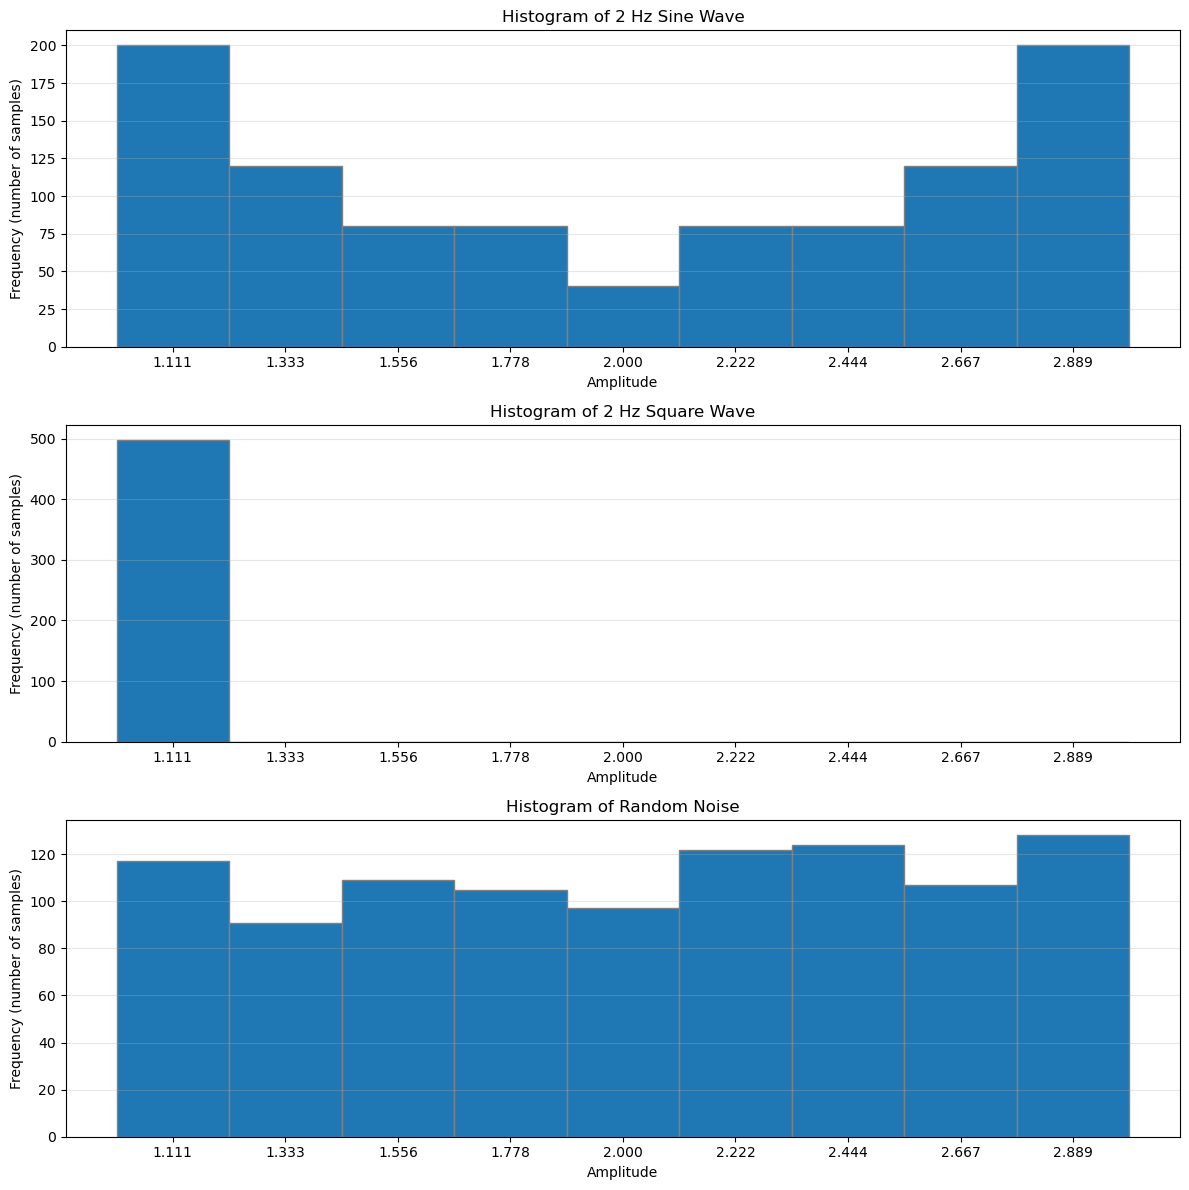

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))
abscissa = np.linspace(1, 3, 10)

# sine wave
sin_counts, sin_bins = np.histogram(signal, bins=abscissa)
sin_bin_centers = (sin_bins[:-1] + sin_bins[1:]) / 2
sin_bin_widths = np.diff(sin_bins)
ax1.bar(x=sin_bin_centers, height=sin_counts, 
        width=sin_bin_widths, align='center', 
        edgecolor= 'gray'
        )
ax1.set_xticks(sin_bin_centers)
ax1.set_xlabel('Amplitude')
ax1.set_ylabel('Frequency (number of samples)')
ax1.set_title('Histogram of 2 Hz Sine Wave')
ax1.grid(True, alpha=0.3, axis='y')

# square wave
square_counts, square_bins = np.histogram(square_wave, bins=abscissa)
square_bin_centers = (square_bins[:-1] + square_bins[1:]) / 2
square_bin_widths = np.diff(square_bins)
ax2.bar(x=square_bin_centers, height=square_counts,
        width=square_bin_widths, align='center',
        edgecolor= 'gray'
        )
ax2.set_xticks(square_bin_centers)
ax2.set_xlabel('Amplitude')
ax2.set_ylabel('Frequency (number of samples)')
ax2.set_title('Histogram of 2 Hz Square Wave')
ax2.grid(True, alpha=0.3, axis='y')

# random noise
random_counts, random_bins = np.histogram(random_noise, bins=abscissa)
random_bin_centers = (random_bins[:-1] + random_bins[1:]) / 2
random_bin_widths = np.diff(random_bins)
ax3.bar(x=random_bin_centers, height=random_counts,
        width=random_bin_widths, align='center',
        edgecolor= 'gray'
        )
ax3.set_xticks(random_bin_centers)
ax3.set_xlabel('Amplitude')
ax3.set_ylabel('Frequency (number of samples)')
ax3.set_title('Histogram of Random Noise')
ax3.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Plot the Probability Mass Function

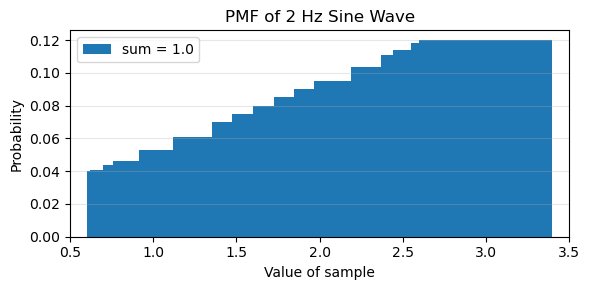

In [59]:
fig, ax1 = plt.subplots(figsize=(6, 3))
abscissa = np.linspace(1, 3, 10)

# sine wave
sin_counts, sin_bins = np.histogram(signal, bins=signal.size)
sin_pmf = (sin_counts / n) * signal

ax1.bar(signal, sin_pmf, label=f'sum = {np.sum(sin_counts/n)}')
#ax1.set_xticks(sin_bin_centers)
ax1.set_xlabel('Value of sample')
ax1.set_ylabel('Probability')
ax1.set_xlim((0.5, 3.5))
ax1.set_title('PMF of 2 Hz Sine Wave')
ax1.grid(True, alpha=0.3, axis='y')
plt.legend()
plt.tight_layout()
plt.show()

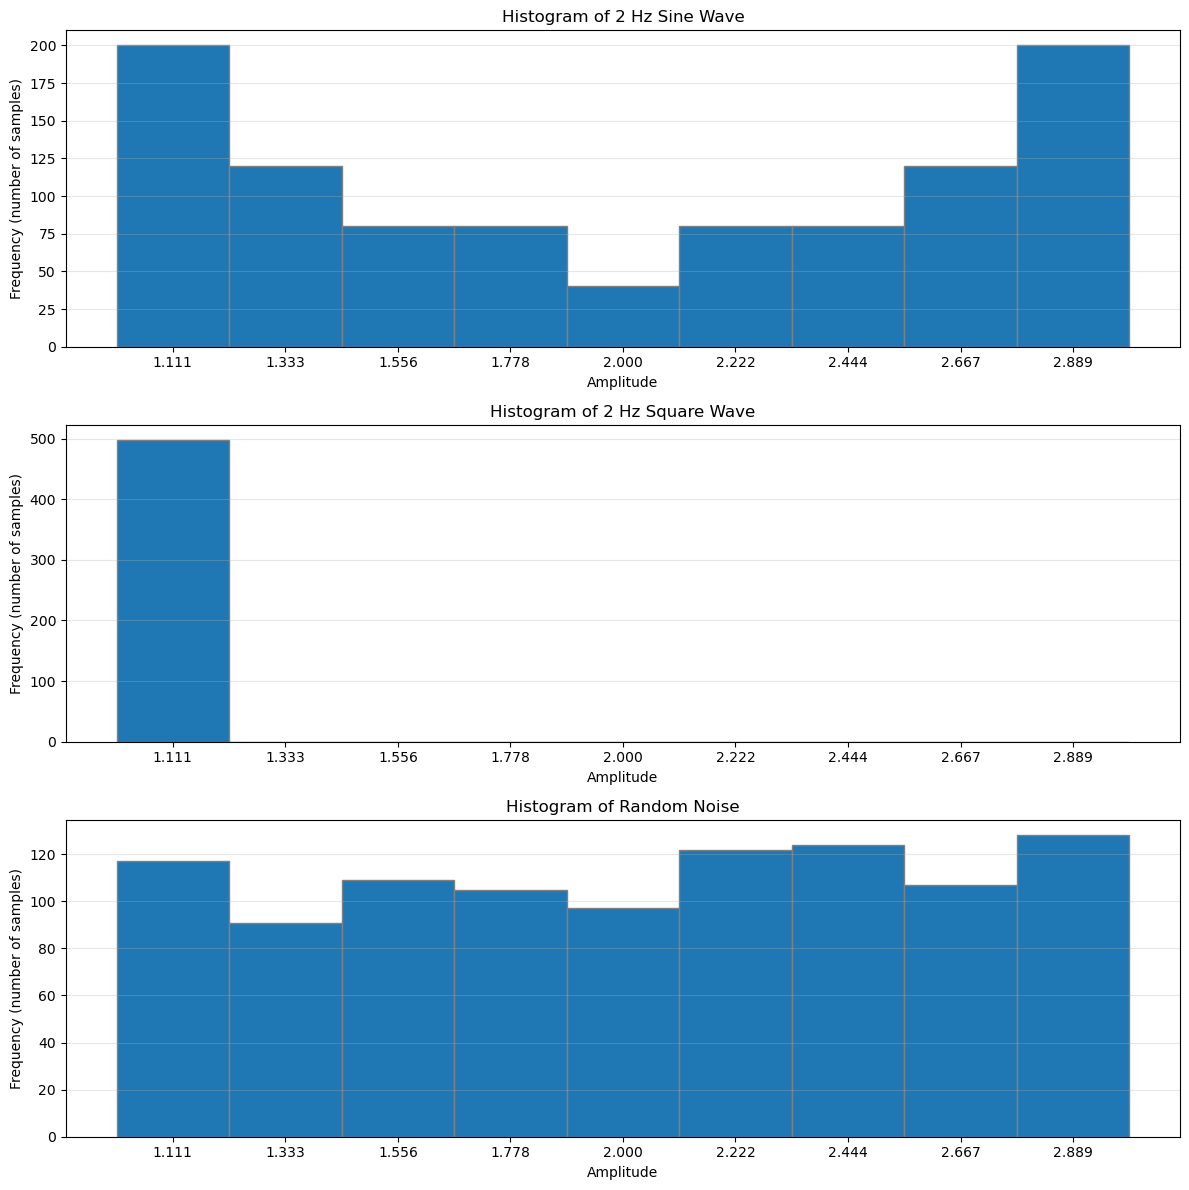

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))
abscissa = np.linspace(1, 3, 10)

# sine wave
sin_counts, sin_bins = np.histogram(signal, bins=abscissa)
sin_bin_centers = (sin_bins[:-1] + sin_bins[1:]) / 2
sin_bin_widths = np.diff(sin_bins)
sin_pmf = sin_counts / n
ax1.plot(sin_bins, sin_pmf)
ax1.set_xticks(sin_bin_centers)
ax1.set_xlabel('Amplitude')
ax1.set_ylabel('Frequency (number of samples)')
ax1.set_title('Histogram of 2 Hz Sine Wave')
ax1.grid(True, alpha=0.3, axis='y')

# square wave
square_counts, square_bins = np.histogram(square_wave, bins=abscissa)
square_bin_centers = (square_bins[:-1] + square_bins[1:]) / 2
square_bin_widths = np.diff(square_bins)
ax2.bar(x=square_bin_centers, height=square_counts,
        width=square_bin_widths, align='center',
        edgecolor= 'gray'
        )
ax2.set_xticks(square_bin_centers)
ax2.set_xlabel('Amplitude')
ax2.set_ylabel('Frequency (number of samples)')
ax2.set_title('Histogram of 2 Hz Square Wave')
ax2.grid(True, alpha=0.3, axis='y')

# random noise
random_counts, random_bins = np.histogram(random_noise, bins=abscissa)
random_bin_centers = (random_bins[:-1] + random_bins[1:]) / 2
random_bin_widths = np.diff(random_bins)
ax3.bar(x=random_bin_centers, height=random_counts,
        width=random_bin_widths, align='center',
        edgecolor= 'gray'
        )
ax3.set_xticks(random_bin_centers)
ax3.set_xlabel('Amplitude')
ax3.set_ylabel('Frequency (number of samples)')
ax3.set_title('Histogram of Random Noise')
ax3.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()